In [290]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [291]:
data = pd.read_csv('flows_balanced.csv')

## Inspecting the dataset structure

In [292]:
data.head()

,flow,pkts,bytes,dur,pps,mean_size,std_size,min_iat,mean_iat,syn,ack,fin,rst,syn_frac,bidir,proto,dport,label
0,"('4', '127.0.0.1', 7842, '127.0.0.1', 9999, 'U...",2,128,9.964550e-01,2.007115e+00,64.0,0.000000,9.964550e-01,9.964550e-01,0,0,0,0,0.0,0,UDP,127.0.0.1,Normal
1,"('4', '127.0.0.1', 5334, '127.0.0.1', 58668, '...",10,1177,6.045740e+01,1.654057e-01,117.7,121.197401,1.716614e-05,6.717489e+00,2,9,0,0,0.2,1,TCP,127.0.0.1,Normal
2,"('4', '127.0.0.1', 9999, '127.0.0.1', 38250, '...",1,64,1.000000e-09,1.000000e+09,64.0,0.000000,1.000000e-09,1.000000e-09,0,0,0,0,0.0,0,UDP,127.0.0.1,Malicious
3,"('4', '127.0.0.1', 9999, '127.0.0.1', 23457, '...",1,64,1.000000e-09,1.000000e+09,64.0,0.000000,1.000000e-09,1.000000e-09,0,0,0,0,0.0,0,UDP,127.0.0.1,Malicious
4,"('4', '127.0.0.1', 4502, '127.0.0.1', 9999, 'U...",2,128,1.123288e+00,1.780487e+00,64.0,0.000000,1.123288e+00,1.123288e+00,0,0,0,0,0.0,0,UDP,127.0.0.1,Normal


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   flow       1979 non-null   object 
 1   pkts       1979 non-null   int64  
 2   bytes      1979 non-null   int64  
 3   dur        1979 non-null   float64
 4   pps        1979 non-null   float64
 5   mean_size  1979 non-null   float64
 6   std_size   1979 non-null   float64
 7   min_iat    1979 non-null   float64
 8   mean_iat   1979 non-null   float64
 9   syn        1979 non-null   int64  
 10  ack        1979 non-null   int64  
 11  fin        1979 non-null   int64  
 12  rst        1979 non-null   int64  
 13  syn_frac   1979 non-null   float64
 14  bidir      1979 non-null   int64  
 15  proto      1979 non-null   object 
 16  dport      1979 non-null   object 
 17  label      1979 non-null   object 
dtypes: float64(7), int64(7), object(4)
memory usage: 278.4+ KB


In [294]:
data.describe()

,pkts,bytes,dur,pps,mean_size,std_size,min_iat,mean_iat,syn,ack,fin,rst,syn_frac,bidir
count,1979.000000,1979.000000,1.979000e+03,1.979000e+03,1979.000000,1979.000000,1.979000e+03,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,2.650328,343.110662,6.979443e+00,4.896418e+08,85.068126,22.383355,3.193694e-01,1.096290e+00,0.073775,0.314300,0.003032,0.013138,0.010679,0.046488
std,2.753436,564.088891,2.009877e+01,5.000184e+08,47.575537,51.661261,4.676590e-01,2.410982e+00,0.367560,1.623654,0.071038,0.113894,0.058301,0.210593
min,1.000000,64.000000,1.000000e-09,8.120427e-02,44.000000,0.000000,1.000000e-09,1.000000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,64.000000,1.000000e-09,1.635967e+00,64.000000,0.000000,1.000000e-09,1.000000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,124.000000,4.506111e-05,4.438417e+04,64.000000,0.000000,1.716614e-05,4.506111e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,128.000000,1.222518e+00,1.000000e+09,64.000000,0.000000,4.898670e-01,1.123288e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,1798.000000,1.231462e+02,1.000000e+09,209.000000,148.956369,1.651381e+00,1.368291e+01,2.000000,10.000000,2.000000,1.000000,0.666667,1.000000


## Check for missing/duplicated values

In [295]:
data.isna().sum()

flow         0
pkts         0
bytes        0
dur          0
pps          0
mean_size    0
std_size     0
min_iat      0
mean_iat     0
syn          0
ack          0
fin          0
rst          0
syn_frac     0
bidir        0
proto        0
dport        0
label        0
dtype: int64

In [296]:
data.duplicated().sum()

np.int64(985)

## Check impossible values

In [297]:
print(data[data['dur'] < 0])
print(data[data['pkts'] < 0])
print(data[data['bytes'] < 0])

Empty DataFrame
Columns: [flow, pkts, bytes, dur, pps, mean_size, std_size, min_iat, mean_iat, syn, ack, fin, rst, syn_frac, bidir, proto, dport, label]
Index: []
Empty DataFrame
Columns: [flow, pkts, bytes, dur, pps, mean_size, std_size, min_iat, mean_iat, syn, ack, fin, rst, syn_frac, bidir, proto, dport, label]
Index: []
Empty DataFrame
Columns: [flow, pkts, bytes, dur, pps, mean_size, std_size, min_iat, mean_iat, syn, ack, fin, rst, syn_frac, bidir, proto, dport, label]
Index: []


## Parse through the flow column and clean dataset

In [298]:
import ast
import pandas as pd

# Convert the string-tuple into an actual tuple using ast.literal_eval
data["flow_tuple"] = data["flow"].apply(ast.literal_eval)

# Extract fields by tuple index
data["ip_proto_number"] = data["flow_tuple"].apply(lambda x: x[0])
data["src_ip"] = data["flow_tuple"].apply(lambda x: x[1])
data["src_port"] = data["flow_tuple"].apply(lambda x: x[2])
data["dst_ip"] = data["flow_tuple"].apply(lambda x: x[3])
data["dst_port"] = data["flow_tuple"].apply(lambda x: x[4])
data["proto_name"] = data["flow_tuple"].apply(lambda x: x[5])

# Drop original tuple column and other redundant columns
data = data.drop(columns=["flow", "flow_tuple", "proto", "dport"])

## Inspect new dataset structure

In [299]:
data.head()

,pkts,bytes,dur,pps,mean_size,std_size,min_iat,mean_iat,syn,ack,...,rst,syn_frac,bidir,label,ip_proto_number,src_ip,src_port,dst_ip,dst_port,proto_name
0,2,128,9.964550e-01,2.007115e+00,64.0,0.000000,9.964550e-01,9.964550e-01,0,0,...,0,0.0,0,Normal,4,127.0.0.1,7842,127.0.0.1,9999,UDP
1,10,1177,6.045740e+01,1.654057e-01,117.7,121.197401,1.716614e-05,6.717489e+00,2,9,...,0,0.2,1,Normal,4,127.0.0.1,5334,127.0.0.1,58668,TCP
2,1,64,1.000000e-09,1.000000e+09,64.0,0.000000,1.000000e-09,1.000000e-09,0,0,...,0,0.0,0,Malicious,4,127.0.0.1,9999,127.0.0.1,38250,UDP
3,1,64,1.000000e-09,1.000000e+09,64.0,0.000000,1.000000e-09,1.000000e-09,0,0,...,0,0.0,0,Malicious,4,127.0.0.1,9999,127.0.0.1,23457,UDP
4,2,128,1.123288e+00,1.780487e+00,64.0,0.000000,1.123288e+00,1.123288e+00,0,0,...,0,0.0,0,Normal,4,127.0.0.1,4502,127.0.0.1,9999,UDP


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pkts             1979 non-null   int64  
 1   bytes            1979 non-null   int64  
 2   dur              1979 non-null   float64
 3   pps              1979 non-null   float64
 4   mean_size        1979 non-null   float64
 5   std_size         1979 non-null   float64
 6   min_iat          1979 non-null   float64
 7   mean_iat         1979 non-null   float64
 8   syn              1979 non-null   int64  
 9   ack              1979 non-null   int64  
 10  fin              1979 non-null   int64  
 11  rst              1979 non-null   int64  
 12  syn_frac         1979 non-null   float64
 13  bidir            1979 non-null   int64  
 14  label            1979 non-null   object 
 15  ip_proto_number  1979 non-null   object 
 16  src_ip           1979 non-null   object 
 17  src_port      

In [301]:
print(data.value_counts('proto_name'))
print(data.value_counts('label'))
print(data.value_counts('ip_proto_number'))

proto_name
UDP    1887
TCP      92
Name: count, dtype: int64
label
Malicious    997
Normal       982
Name: count, dtype: int64
ip_proto_number
4    1669
6     310
Name: count, dtype: int64


## Check the label distributions

In [302]:
data['label'].value_counts()

label
Malicious    997
Normal       982
Name: count, dtype: int64

In [303]:
data['label'].value_counts(normalize=True)

label
Malicious    0.50379
Normal       0.49621
Name: proportion, dtype: float64

## Visualize label distribution

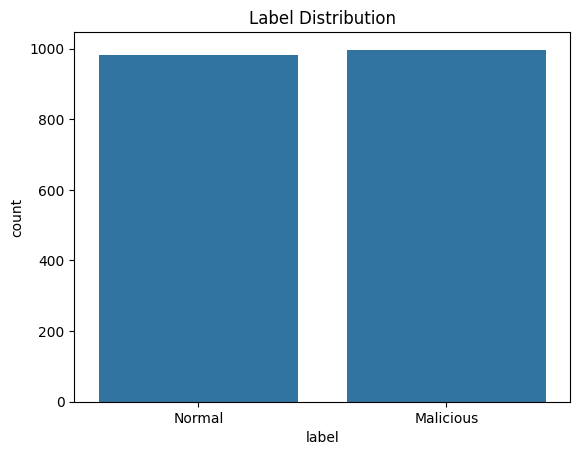

In [304]:
sns.countplot(data=data, x='label')
plt.title("Label Distribution")
plt.show()

## Visualize Protocol distribution

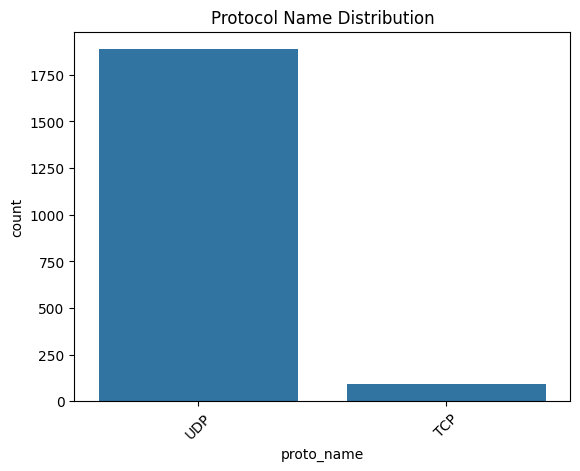

In [305]:
sns.countplot(data=data, x='proto_name')
plt.title("Protocol Name Distribution")
plt.xticks(rotation=45)
plt.show()

## Visualize Packet & byte distributions

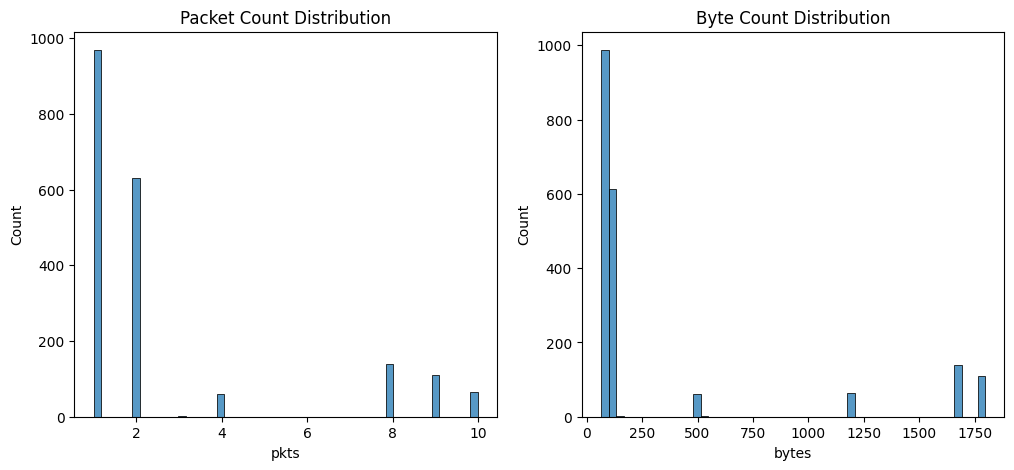

In [306]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['pkts'], bins=50, ax=ax[0])
ax[0].set_title("Packet Count Distribution")

sns.histplot(data['bytes'], bins=50, ax=ax[1])
ax[1].set_title("Byte Count Distribution")

plt.show()


## Correlation Heatmap

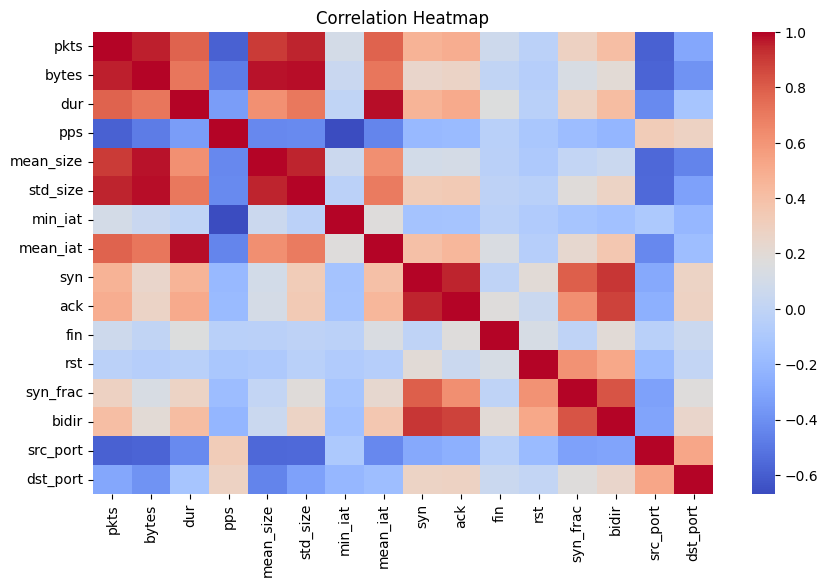

In [307]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Perform one hot encoding

In [308]:
from sklearn.preprocessing import OneHotEncoder

# Encode labels: Normal -> 0, Malicious -> 1
data["label"] = data["label"].map({"Normal": 0, "Malicious": 1})

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # handle unseen IPs in test data

# Fit and transform IP columns
ip_encoded = ohe.fit_transform(data[["src_ip", "dst_ip"]])

# Convert to DataFrame with proper column names
ip_encoded_df = pd.DataFrame(
    ip_encoded,
    columns=ohe.get_feature_names_out(["src_ip", "dst_ip"]),
    index=data.index
)

# Drop original IP columns and add one-hot columns
data = pd.concat([data.drop(columns=["src_ip", "dst_ip"]), ip_encoded_df], axis=1)


# Convert protocol number to integer
data["ip_proto_number"] = data["ip_proto_number"].astype(int)

# One-hot encode protocol name (TCP/UDP)
data = pd.get_dummies(data, columns=["proto_name"], drop_first=True)


## Dataset is now ready for ML 

In [309]:
data.head()

,pkts,bytes,dur,pps,mean_size,std_size,min_iat,mean_iat,syn,ack,...,dst_port,src_ip_127.0.0.1,src_ip_fe80::2462:a1ff:fed5:d65c,src_ip_fe80::30dc:34ff:fe29:ab81,src_ip_fe80::3c8e:79ff:feda:2adb,src_ip_fe80::845e:5aff:fea1:194e,src_ip_fe80::ac78:b7ff:fe27:7cb8,dst_ip_127.0.0.1,dst_ip_ff02::fb,proto_name_UDP
0,2,128,9.964550e-01,2.007115e+00,64.0,0.000000,9.964550e-01,9.964550e-01,0,0,...,9999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
1,10,1177,6.045740e+01,1.654057e-01,117.7,121.197401,1.716614e-05,6.717489e+00,2,9,...,58668,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
2,1,64,1.000000e-09,1.000000e+09,64.0,0.000000,1.000000e-09,1.000000e-09,0,0,...,38250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
3,1,64,1.000000e-09,1.000000e+09,64.0,0.000000,1.000000e-09,1.000000e-09,0,0,...,23457,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
4,2,128,1.123288e+00,1.780487e+00,64.0,0.000000,1.123288e+00,1.123288e+00,0,0,...,9999,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True


In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pkts                              1979 non-null   int64  
 1   bytes                             1979 non-null   int64  
 2   dur                               1979 non-null   float64
 3   pps                               1979 non-null   float64
 4   mean_size                         1979 non-null   float64
 5   std_size                          1979 non-null   float64
 6   min_iat                           1979 non-null   float64
 7   mean_iat                          1979 non-null   float64
 8   syn                               1979 non-null   int64  
 9   ack                               1979 non-null   int64  
 10  fin                               1979 non-null   int64  
 11  rst                               1979 non-null   int64  
 12  syn_fr

## Split dataset (train/test data) and create piplines

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_data = data["label"]
X_data = data.drop(columns=["label"])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=500, random_state=42))
    ]),
    "SVM-RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, random_state=42))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}



## Train and evaluate models


========== RandomForest ==========
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000


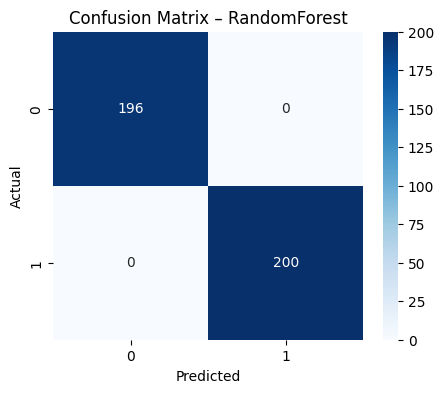


========== XGBoost ==========
Accuracy:   0.9975
Precision:  1.0000
Recall:     0.9950
F1 Score:   0.9975
ROC-AUC:    0.9975


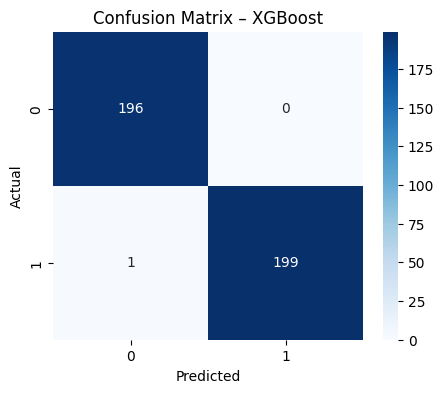


========== LogisticRegression ==========
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000


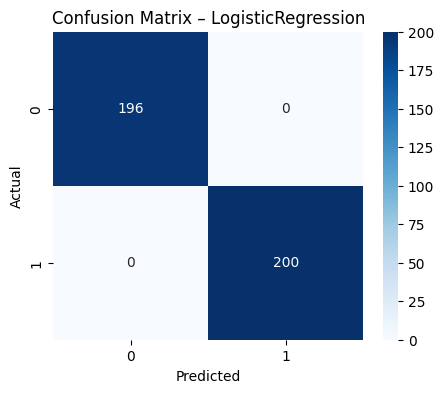


========== SVM-RBF ==========
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000


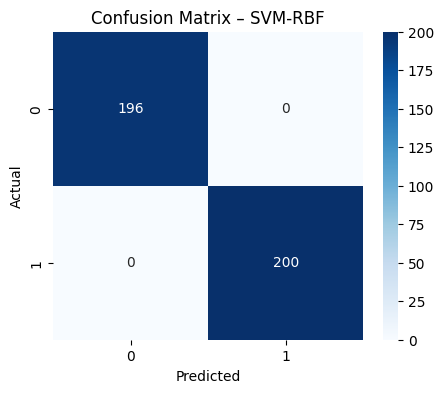


========== KNN ==========
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000


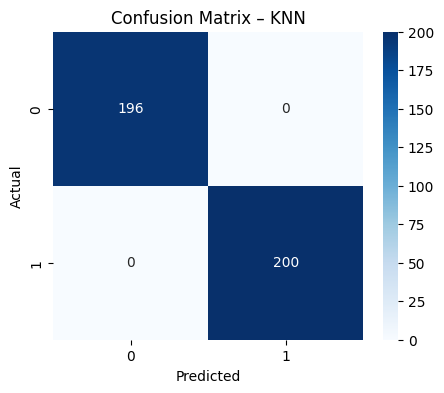


========== DecisionTree ==========
Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1 Score:   1.0000
ROC-AUC:    1.0000


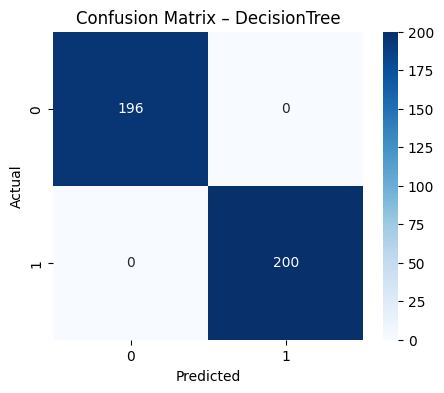

In [312]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n========== {name} ==========")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
    
    print(f"Accuracy:   {acc:.4f}")
    print(f"Precision:  {prec:.4f}")
    print(f"Recall:     {rec:.4f}")
    print(f"F1 Score:   {f1:.4f}")
    print(f"ROC-AUC:    {roc:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

## Feature Important (RandomForest / XGBoost)

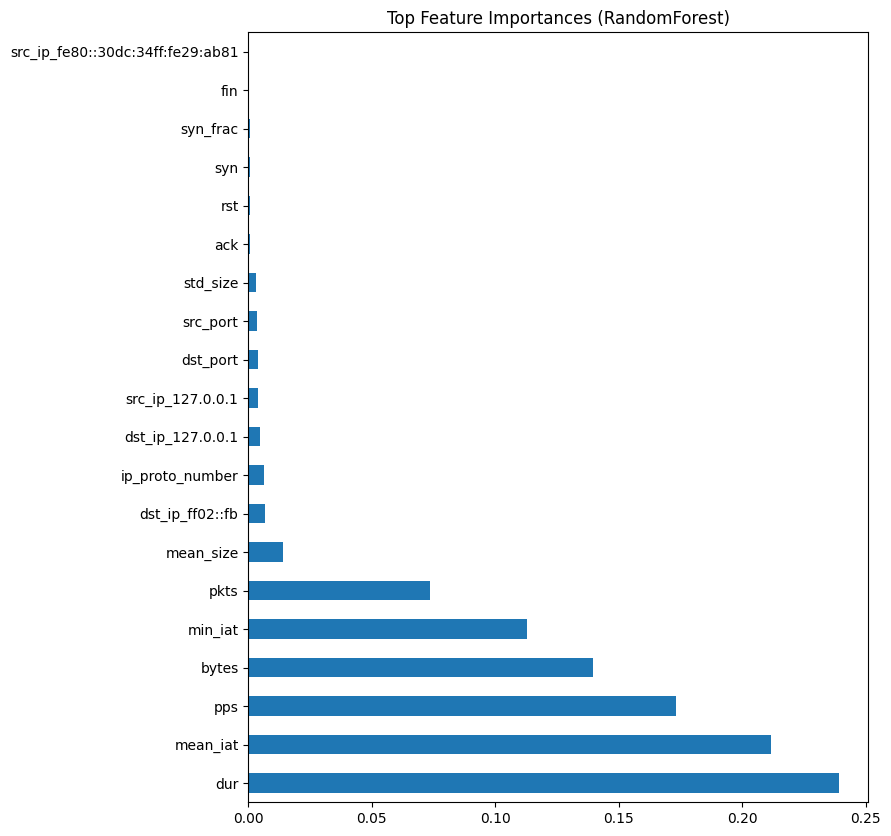

In [317]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 10))
feat_imp.plot(kind='barh')
plt.title("Top Feature Importances (RandomForest)")
plt.show()

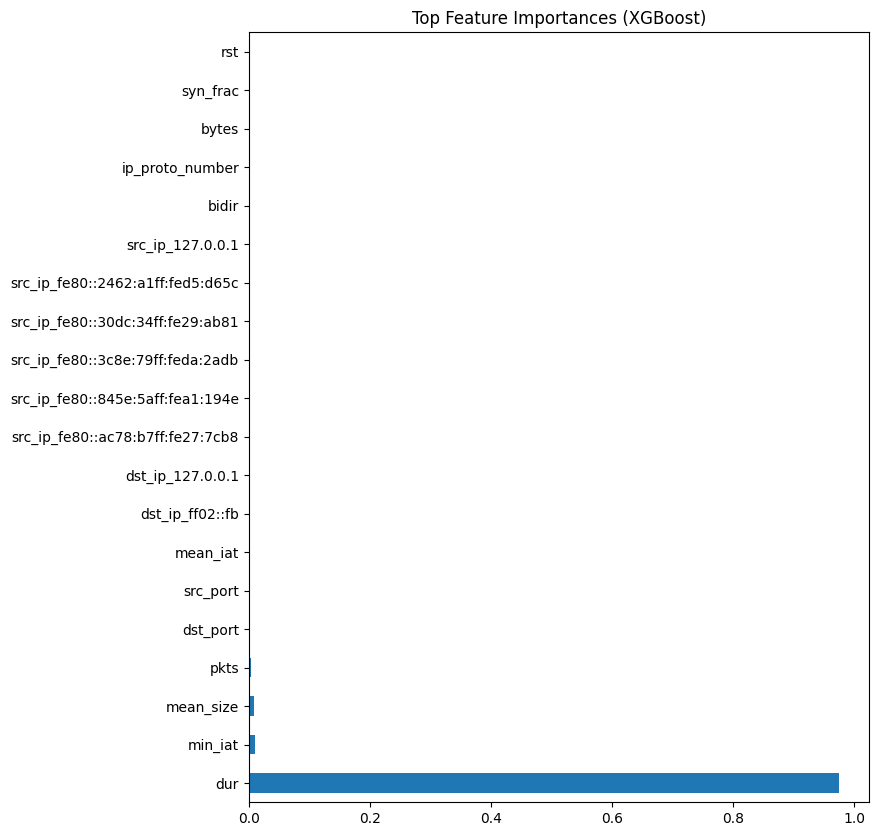

In [316]:
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
feat_imp_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 10))
feat_imp_xgb.plot(kind='barh')
plt.title("Top Feature Importances (XGBoost)")
plt.show()

## Visualize top feature distributions

RandomForest Top Features Analysis:


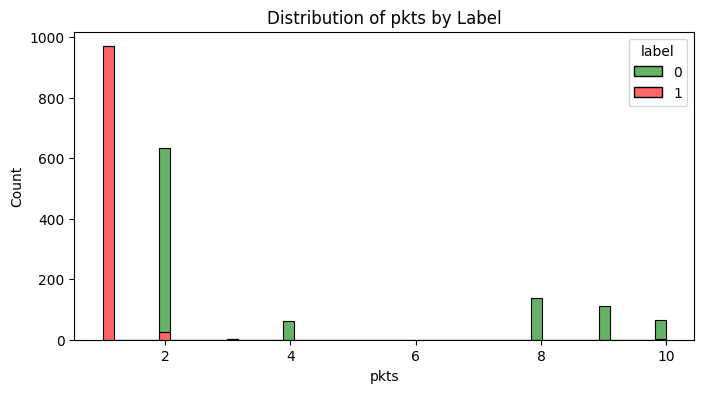

pkts has 7 unique values



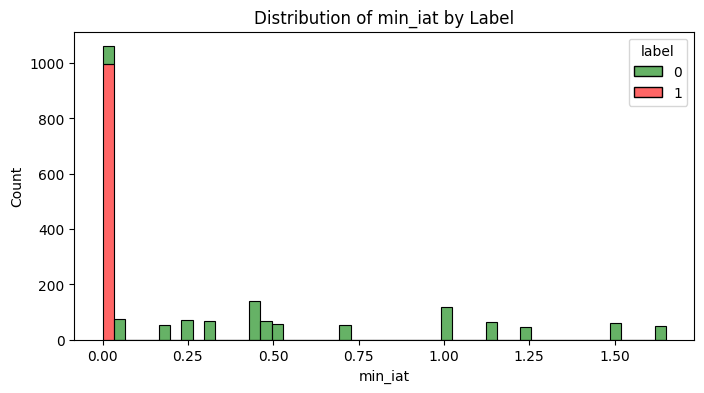

min_iat has 27 unique values



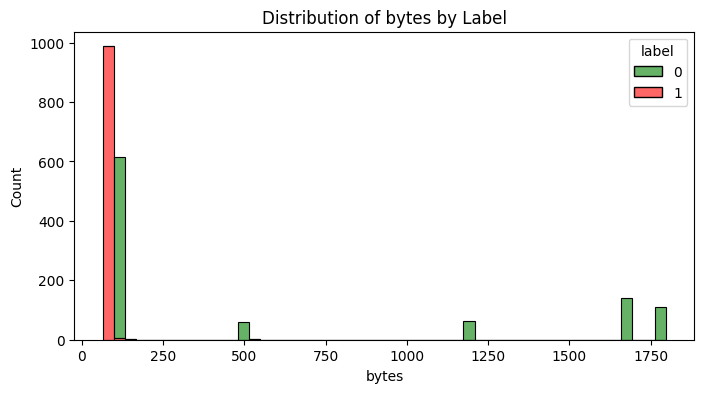

bytes has 10 unique values



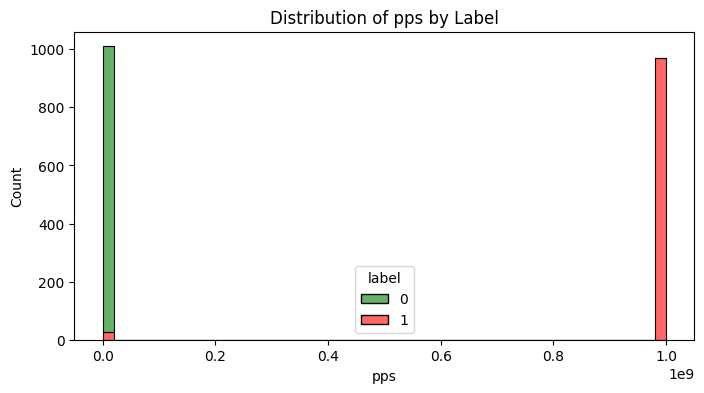

pps has 27 unique values



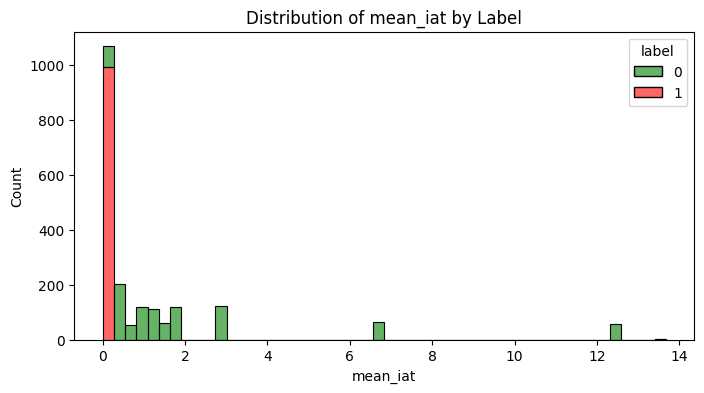

mean_iat has 28 unique values



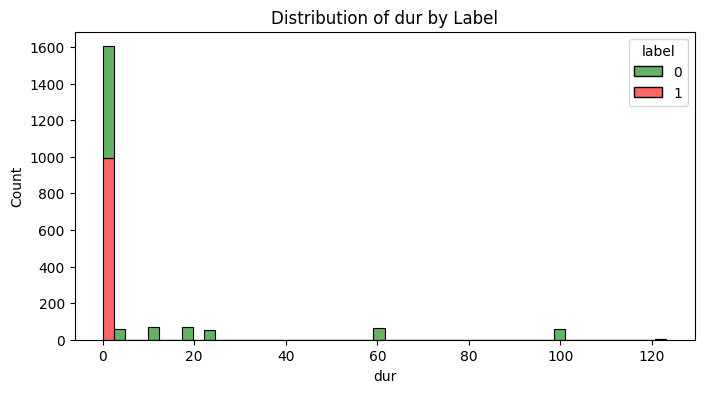

dur has 28 unique values

XGBoost Top Features Analysis:


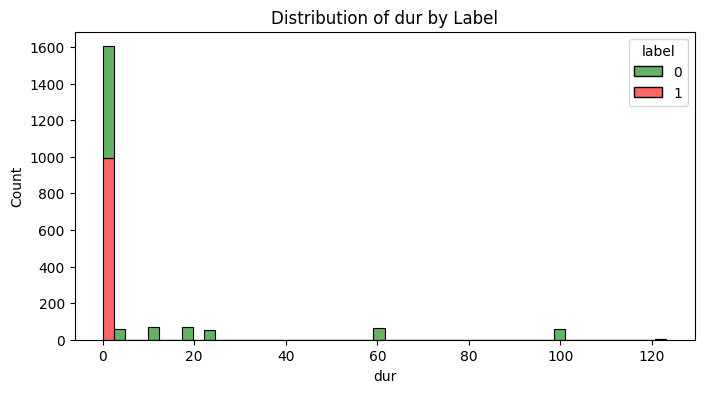

dur has 28 unique values



In [318]:
# List of top features
rf_top_features = ["pkts", "min_iat", "bytes", "pps", "mean_iat", "dur"]
xgb_top_features = ["dur"]

# Function to plot distributions
def plot_feature_distributions(features, data, target="label"):
    for feat in features:
        plt.figure(figsize=(8,4))
        sns.histplot(data=data, x=feat, hue=target, bins=50, kde=False, palette=["green","red"], alpha=0.6, multiple="stack")
        plt.title(f"Distribution of {feat} by Label")
        plt.xlabel(feat)
        plt.ylabel("Count")
        plt.show()
        
        # Unique values count
        n_unique = data[feat].nunique()
        print(f"{feat} has {n_unique} unique values\n")

# Plot RandomForest top features
print("RandomForest Top Features Analysis:")
plot_feature_distributions(rf_top_features, data)

# Plot XGBoost top features
print("XGBoost Top Features Analysis:")
plot_feature_distributions(xgb_top_features, data)
